In [44]:
#Import all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#verify current path
import os
os.getcwd()

'C:\\Users\\kvenugopal\\E6SS'

In [3]:
#change path
os.chdir("C:/Users\kvenugopal/OneDrive - ZF Friedrichshafen AG/Desktop")

In [4]:
#verify new directory
os.getcwd()

'C:\\Users\\kvenugopal\\OneDrive - ZF Friedrichshafen AG\\Desktop'

In [5]:
#read excel file
dt=pd.read_excel("SS50R_rev1.xlsx", sheet_name='Sheet1')

In [6]:
#make a copy
dt1=dt.copy()

In [7]:
#Information of the file and data types
dt1.head()
dt1.shape

(113, 13)

In [8]:
dt1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rubber_seal_outer_Diameter         113 non-null    float64
 1   Rubber seal Thickness              113 non-null    float64
 2   Spring seat Depth                  113 non-null    float64
 3   Rubber spring depth                113 non-null    float64
 4   TOTAL PISTON HEIGHT                113 non-null    float64
 5   Spring seat thickness              113 non-null    float64
 6   Pressure_piece_height              113 non-null    float64
 7   AFTER LOAD AT 0.5 MM               113 non-null    float64
 8   AFTER LOAD AT 3 MM                 113 non-null    float64
 9   AFTER LOAD AT 0.5 MM(2 HRS LATER)  113 non-null    int64  
 10  AFTER LOAD AT 3 MM(2 HRS LATER)    113 non-null    int64  
 11  Crack_ off                         113 non-null    float64

In [9]:
dt1.describe()

,Rubber_seal_outer_Diameter,Rubber seal Thickness,Spring seat Depth,Rubber spring depth,TOTAL PISTON HEIGHT,Spring seat thickness,Pressure_piece_height,AFTER LOAD AT 0.5 MM,AFTER LOAD AT 3 MM,AFTER LOAD AT 0.5 MM(2 HRS LATER),AFTER LOAD AT 3 MM(2 HRS LATER),Crack_ off,6.9 mm Test
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,35.828053,13.073850,6.871327,9.073159,27.525407,5.265611,73.022867,204.776106,554.876106,187.141593,517.486726,2.357788,6.438319
std,0.118839,0.096575,0.056350,0.025716,0.072850,0.037085,0.049208,31.739091,93.071551,22.295446,28.994185,0.385382,0.209049
min,35.410000,12.730000,6.710000,9.009000,27.400000,5.180000,72.900000,154.000000,474.000000,131.000000,463.000000,0.500000,5.290000
25%,35.760000,13.040000,6.840000,9.060000,27.482000,5.240000,72.990000,186.000000,504.000000,171.000000,498.000000,2.270000,6.420000
50%,35.820000,13.090000,6.884000,9.080000,27.520000,5.270000,73.017000,197.000000,521.000000,190.000000,514.000000,2.410000,6.460000
75%,35.870000,13.110000,6.901000,9.090000,27.560000,5.290000,73.060000,214.000000,567.000000,204.000000,532.000000,2.540000,6.500000
max,36.270000,13.480000,6.980000,9.140000,27.800000,5.400000,73.140000,304.700000,915.000000,241.000000,599.000000,2.890000,7.130000


In [10]:
from pandas_profiling import ProfileReport

In [11]:
profile = ProfileReport(df=dt1)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


In [12]:
dt1.corr()

,Rubber_seal_outer_Diameter,Rubber seal Thickness,Spring seat Depth,Rubber spring depth,TOTAL PISTON HEIGHT,Spring seat thickness,Pressure_piece_height,AFTER LOAD AT 0.5 MM,AFTER LOAD AT 3 MM,AFTER LOAD AT 0.5 MM(2 HRS LATER),AFTER LOAD AT 3 MM(2 HRS LATER),Crack_ off,6.9 mm Test
Rubber_seal_outer_Diameter,1.000000,-0.035152,-0.036959,-0.000660,0.001523,0.015706,-0.075557,0.077205,0.149803,-0.012906,-0.011015,-0.038546,-0.047829
Rubber seal Thickness,-0.035152,1.000000,0.104310,0.050449,-0.091342,-0.098884,-0.025219,-0.276120,-0.454182,0.133380,0.098651,0.553314,0.427092
Spring seat Depth,-0.036959,0.104310,1.000000,0.040167,-0.057411,-0.071914,-0.000451,0.012718,0.074451,-0.017598,0.059370,0.007697,-0.001310
Rubber spring depth,-0.000660,0.050449,0.040167,1.000000,-0.022606,-0.111774,0.051459,-0.033594,-0.141445,0.098425,0.107307,0.136560,0.036539
TOTAL PISTON HEIGHT,0.001523,-0.091342,-0.057411,-0.022606,1.000000,0.040755,-0.196943,0.058296,0.062393,-0.076721,0.141318,0.051040,0.074045
Spring seat thickness,0.015706,-0.098884,-0.071914,-0.111774,0.040755,1.000000,0.066355,0.212040,0.122149,0.126973,-0.047494,-0.094576,-0.116510
Pressure_piece_height,-0.075557,-0.025219,-0.000451,0.051459,-0.196943,0.066355,1.000000,0.045891,-0.112865,0.180782,-0.092165,-0.030379,-0.002695
AFTER LOAD AT 0.5 MM,0.077205,-0.276120,0.012718,-0.033594,0.058296,0.212040,0.045891,1.000000,0.771694,0.231170,0.064110,-0.477845,-0.426047
AFTER LOAD AT 3 MM,0.149803,-0.454182,0.074451,-0.141445,0.062393,0.122149,-0.112865,0.771694,1.000000,-0.078456,0.172040,-0.689908,-0.593337
AFTER LOAD AT 0.5 MM(2 HRS LATER),-0.012906,0.133380,-0.017598,0.098425,-0.076721,0.126973,0.180782,0.231170,-0.078456,1.000000,0.301587,0.189088,0.158419


<Figure size 720x504 with 0 Axes>

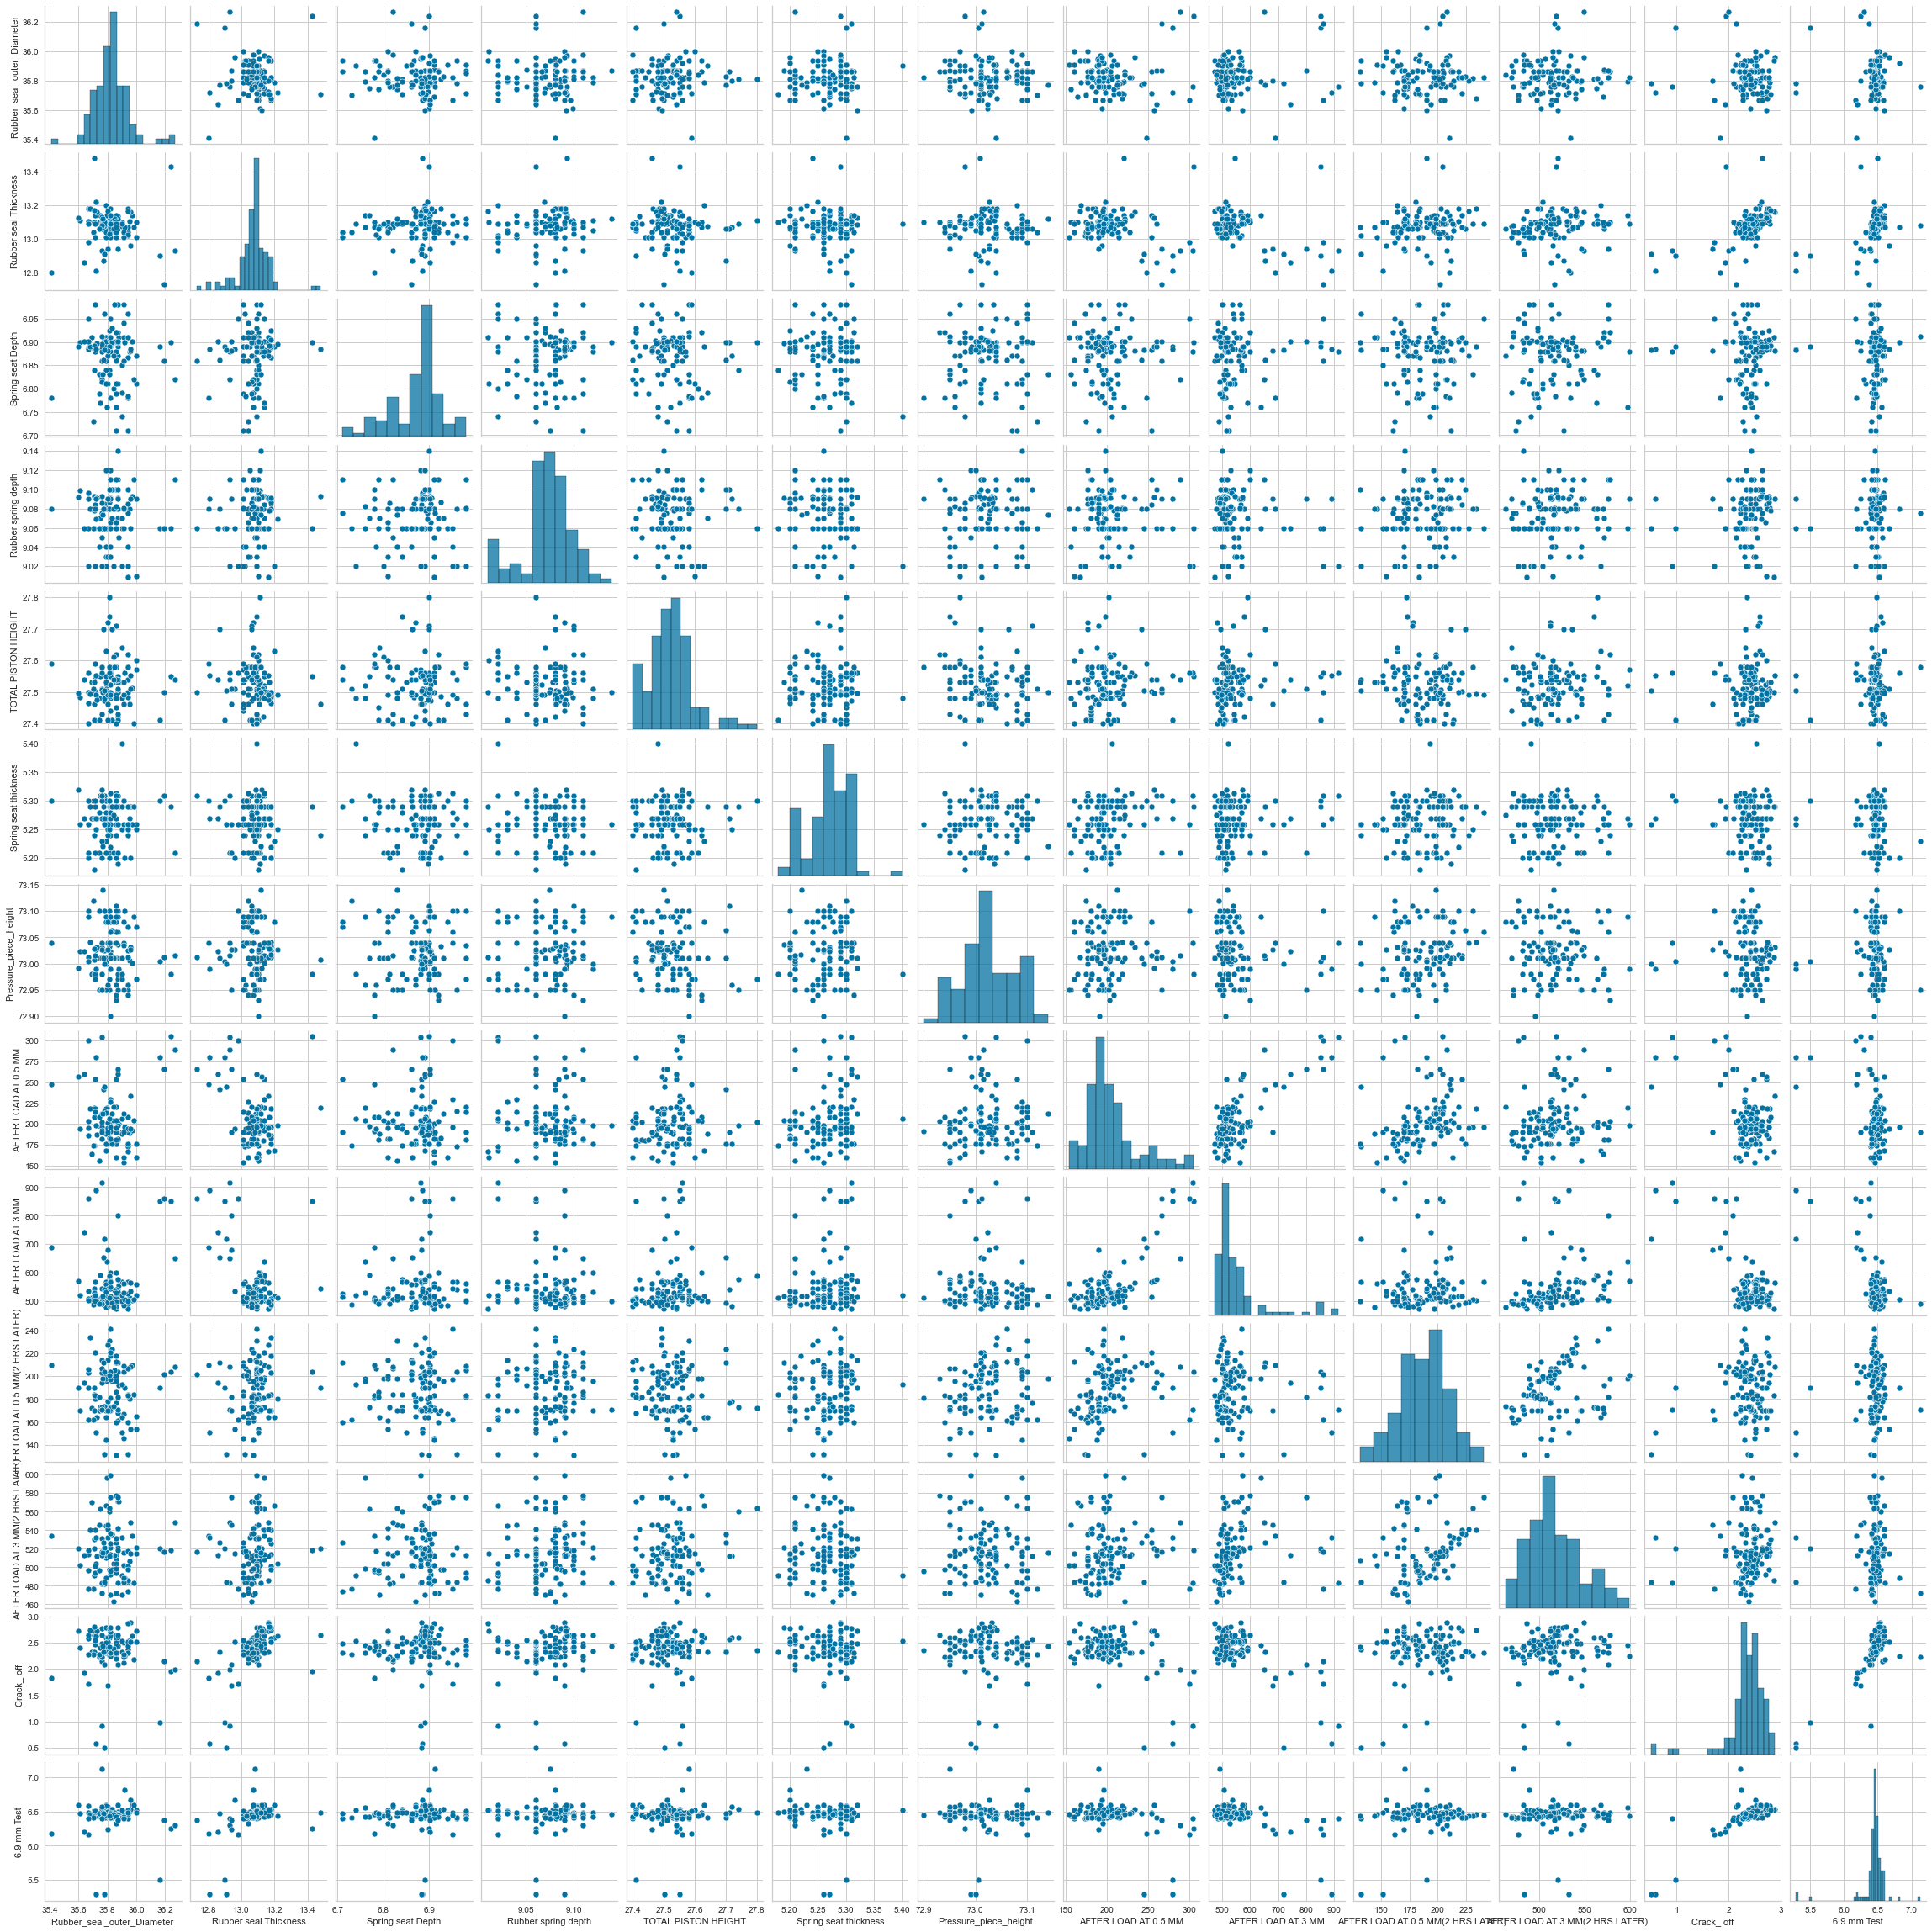

In [45]:
figure=plt.figure(figsize=(10,7))
sns.pairplot(dt1)
plt.show()

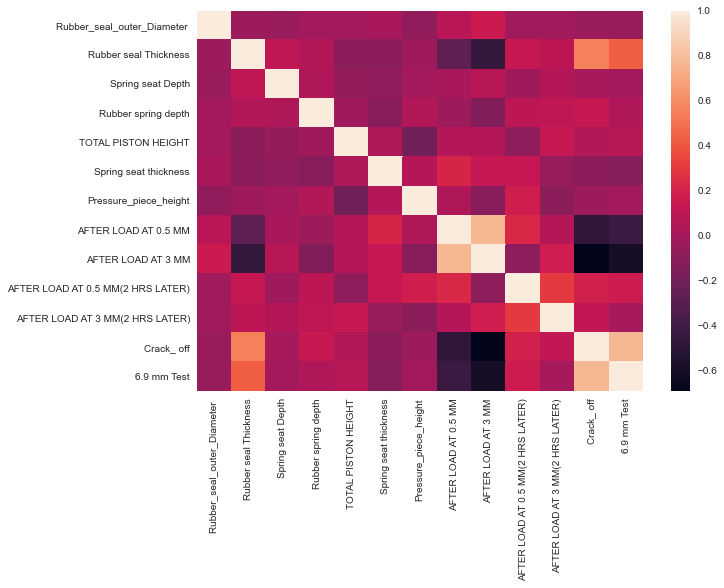

In [46]:
figure=plt.figure(figsize=(10,7))
sns.heatmap(dt1.corr())
plt.show()

In [15]:
dt1.columns

Index(['Rubber_seal_outer_Diameter ', 'Rubber seal Thickness',
       'Spring seat Depth', 'Rubber spring depth', 'TOTAL PISTON HEIGHT',
       'Spring seat thickness', 'Pressure_piece_height',
       'AFTER LOAD AT 0.5 MM', 'AFTER LOAD AT 3 MM',
       'AFTER LOAD AT 0.5 MM(2 HRS LATER)', 'AFTER LOAD AT 3 MM(2 HRS LATER)',
       'Crack_ off', '6.9 mm Test'],
      dtype='object')

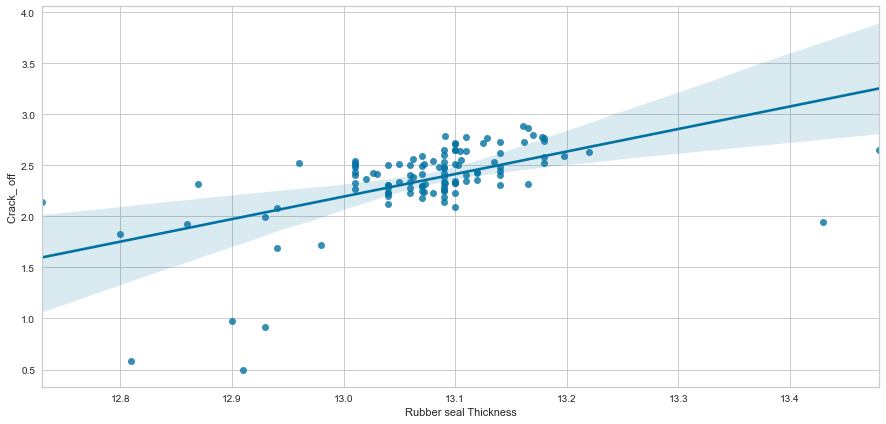

In [47]:
figure=plt.figure(figsize=(15,7))
sns.regplot(x='Rubber seal Thickness', y='Crack_ off', data=dt1)
plt.show()

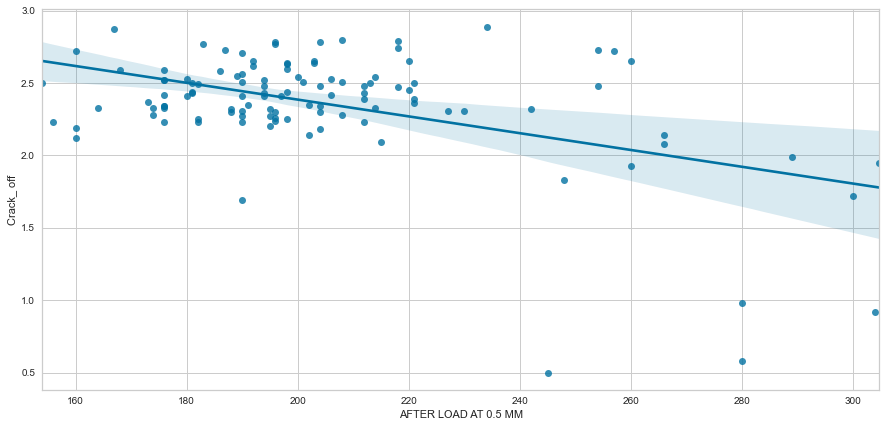

In [48]:
figure=plt.figure(figsize=(15,7))
sns.regplot(x='AFTER LOAD AT 0.5 MM', y='Crack_ off', data=dt1)
plt.show()

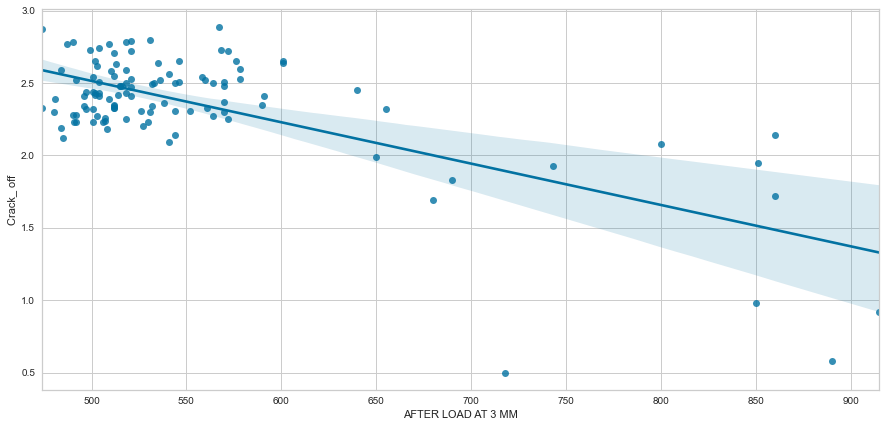

In [52]:
figure=plt.figure(figsize=(15,7))
sns.regplot(x='AFTER LOAD AT 3 MM', y='Crack_ off', data=dt1)
plt.show()

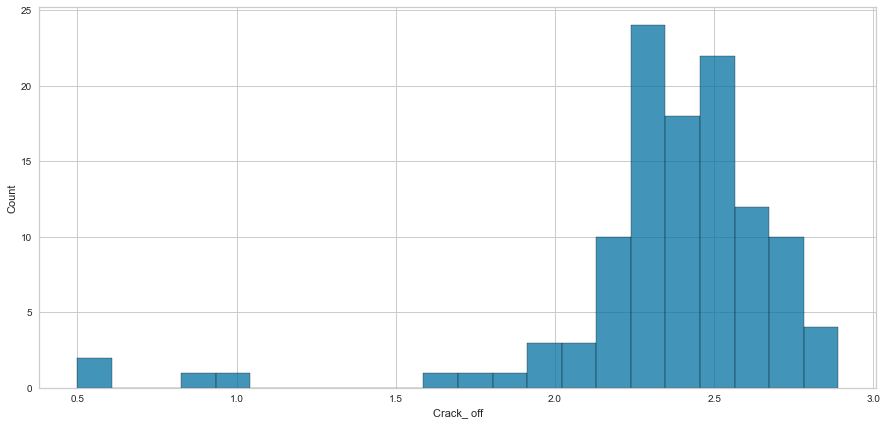

In [49]:
figure=plt.figure(figsize=(15,7))
sns.histplot(x='Crack_ off', data=dt1)
plt.show()

In [19]:
#k means clustering
# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [20]:
dt2=dt1.drop(['6.9 mm Test'], axis=1)
dt2.shape

(113, 12)

In [21]:
dt2.columns

Index(['Rubber_seal_outer_Diameter ', 'Rubber seal Thickness',
       'Spring seat Depth', 'Rubber spring depth', 'TOTAL PISTON HEIGHT',
       'Spring seat thickness', 'Pressure_piece_height',
       'AFTER LOAD AT 0.5 MM', 'AFTER LOAD AT 3 MM',
       'AFTER LOAD AT 0.5 MM(2 HRS LATER)', 'AFTER LOAD AT 3 MM(2 HRS LATER)',
       'Crack_ off'],
      dtype='object')

In [22]:
dt2.columns=['rsdia','rsthick','ssdepth','rsdepth','tpheight','ssthick','ppheight','load1','load2','load_1','load_2','crackoff']
dt2.head()             

,rsdia,rsthick,ssdepth,rsdepth,tpheight,ssthick,ppheight,load1,load2,load_1,load_2,crackoff
0,35.795,13.140,6.76,9.06,27.52,5.27,73.09,220.0,640.0,198,597,2.45
1,35.810,13.090,6.84,9.08,27.74,5.29,72.95,198.0,578.0,173,560,2.60
2,35.869,13.135,6.87,9.08,27.42,5.26,72.97,180.0,578.0,181,541,2.53
3,35.790,13.198,6.89,9.02,27.63,5.23,73.08,168.0,518.0,164,567,2.59
4,35.870,13.060,6.92,9.07,27.41,5.26,72.98,181.0,544.0,168,571,2.50


In [23]:
X=dt2[['rsdia','rsthick','ssdepth','rsdepth','tpheight','ssthick','ppheight','load1','load2','load_1','load_2']]
y=dt2['crackoff']

In [24]:
#Scaling the X and regressing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_new=scaler.fit_transform(X)
X_new=pd.DataFrame(X_new)
X_new.columns=['rsdia','rsthick','ssdepth','rsdepth','tpheight','ssthick','ppheight','load1','load2','load_1','load_2']
X_new

,rsdia,rsthick,ssdepth,rsdepth,tpheight,ssthick,ppheight,load1,load2,load_1,load_2
0,-0.279372,0.688017,-1.984440,-0.513988,-0.074553,0.118887,1.370329,0.481794,0.918681,0.489193,2.754603
1,-0.152589,0.167977,-0.558420,0.267191,2.958799,0.660592,-1.487383,-0.214445,0.249560,-0.637107,1.472800
2,0.346093,0.636013,-0.023662,0.267191,-1.453349,-0.151965,-1.079138,-0.784095,0.249560,-0.276691,0.814578
3,-0.321634,1.291264,0.332843,-2.076346,1.442123,-0.964522,1.166206,-1.163862,-0.397977,-1.042575,1.715303
4,0.354545,-0.144046,0.867601,-0.123399,-1.591228,-0.151965,-0.875016,-0.752448,-0.117378,-0.862367,1.853877
...,...,...,...,...,...,...,...,...,...,...,...
108,1.115246,-1.184126,0.225892,-0.513988,-0.212432,-1.777079,0.084358,-0.341034,-0.203716,-1.493095,-0.086148
109,-0.237111,-1.392142,0.190241,0.657780,-0.901830,-0.151965,0.063946,-0.467623,1.350372,-0.772263,0.987794
110,-0.913290,-2.744246,0.225892,0.657780,0.352874,0.118887,-0.670894,2.380628,3.616751,-1.628251,0.502788
111,0.354545,-1.392142,0.528921,0.657780,-0.226220,-1.506226,-1.487383,1.937567,2.645446,-0.231639,2.027093


In [25]:
y.shape

(113,)

In [26]:
#regression without scaling
reg=LinearRegression()
reg.fit(X_new,y)

LinearRegression()

In [27]:
print(reg.coef_)
print(reg.intercept_)

[ 2.57224550e-02  9.04148998e-02  1.25798970e-02  2.69759504e-03
  2.85265939e-02 -2.43938169e-04 -3.24820910e-02  4.91024779e-02
 -2.81790608e-01  1.50390551e-02  6.75413535e-02]
2.357787610619479


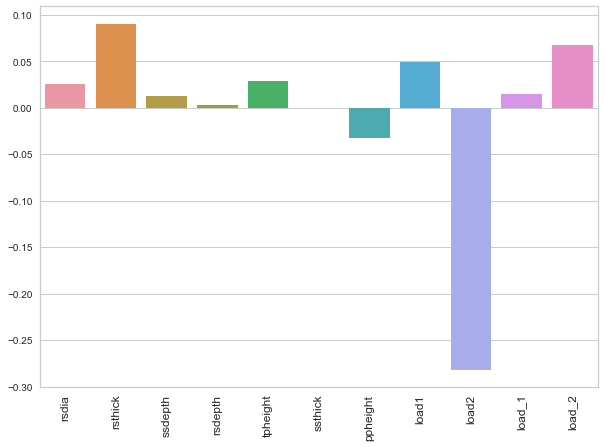

In [51]:
coef=reg.coef_
features=X.columns
figure = plt.figure(figsize=[10, 7])
plt.xticks(rotation=90, size=12)
sns.barplot(x=X_new.columns, y=coef)
plt.show()

In [29]:
y_pred=reg.predict(X_new)
y_pred


array([2.29797921, 2.50434296, 2.36028074, 2.62351552, 2.45590509,
       2.37198244, 2.38552854, 2.51524775, 2.46901991, 2.50924237,
       2.36933054, 2.57291974, 2.18890419, 2.61966638, 2.24701844,
       2.20434724, 2.35901548, 2.47453217, 2.41670714, 2.37718026,
       2.50898867, 2.25584975, 2.55182472, 2.52317425, 2.40949867,
       2.57160065, 2.359945  , 2.52196198, 2.37439543, 2.42263538,
       2.47858275, 2.56996379, 2.66089869, 2.76215445, 2.57285797,
       2.50767577, 2.50777668, 2.50634144, 2.42134518, 2.5775802 ,
       2.51363396, 2.54134723, 2.53915226, 2.56037408, 2.51385085,
       2.66509743, 2.68130947, 2.52146975, 2.40752092, 2.24908684,
       2.35036206, 2.38650873, 2.4603485 , 2.47695725, 2.43962556,
       2.43099734, 2.23205513, 2.34487426, 2.4128333 , 2.51944688,
       2.24983054, 2.34410622, 2.35722933, 2.55458855, 2.23286439,
       2.56631828, 2.30107353, 2.60231936, 2.43200261, 2.41871296,
       2.56259594, 2.50391213, 2.40123618, 2.41333047, 2.48203

In [53]:
from sklearn.metrics import r2_score
print(r2_score(y,y_pred))

0.6083491078641745


In [31]:
from sklearn.ensemble import RandomForestRegressor
X=dt2[['rsdia', 'rsthick', 'ssdepth', 'rsdepth', 'tpheight', 'ssthick',
       'ppheight', 'load1', 'load2']]
feature_names = [f"feature {i}" for i in range(X.shape[1])]
y=dt2['crackoff']
forest=RandomForestRegressor(random_state=0)
forest.fit(X,y)
importances=forest.feature_importances_

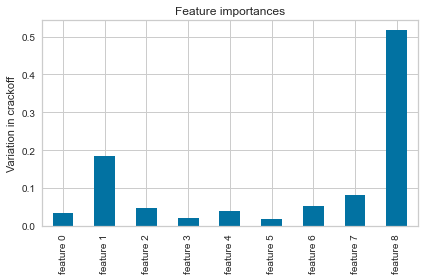

In [54]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Variation in crackoff")
fig.tight_layout()

In [33]:
#pycaret-regression

In [35]:
data = dt2.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = dt2.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (90, 12)
Unseen Data For Predictions: (23, 12)


In [36]:
data.head

<bound method NDFrame.head of      rsdia  rsthick  ssdepth  rsdepth  tpheight  ssthick  ppheight  load1  \
0   35.760   12.930    6.880    9.020     27.56    5.310     73.04  304.0   
1   35.700   13.040    6.730    9.060     27.51    5.300     73.12  174.0   
2   35.760   13.060    6.814    9.086     27.58    5.200     72.98  182.0   
3   35.791   13.090    6.840    9.030     27.51    5.280     72.95  194.0   
4   35.860   13.090    6.862    9.060     27.40    5.240     73.06  160.0   
..     ...      ...      ...      ...       ...      ...       ...    ...   
85  35.910   13.040    6.940    9.060     27.46    5.300     73.08  160.0   
86  35.840   13.062    6.870    9.080     27.54    5.276     73.08  221.0   
87  35.814   13.090    6.830    9.080     27.58    5.250     73.10  196.0   
88  35.870   13.090    6.980    9.110     27.43    5.260     73.10  181.0   
89  35.690   13.100    6.910    9.080     27.53    5.270     72.98  164.0   

    load2  load_1  load_2  crackoff  
0   915

In [37]:
from pycaret.regression import *

In [60]:
exp_reg101 = setup(data = data, target = 'crackoff', session_id=123,normalize=True,transformation=True)

,Description,Value
0,session_id,123
1,Target,crackoff
2,Original Data,"(90, 12)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(62, 11)"


In [61]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1570,0.0520,0.2040,0.3048,0.0718,0.0953,0.0560
xgboost,Extreme Gradient Boosting,0.1445,0.0452,0.1909,0.3030,0.0672,0.0874,0.1040
catboost,CatBoost Regressor,0.1688,0.0740,0.2292,0.2480,0.0812,0.1121,0.8120
et,Extra Trees Regressor,0.1781,0.0702,0.2300,0.2419,0.0822,0.1111,0.0470
gbr,Gradient Boosting Regressor,0.1586,0.0498,0.2033,0.1873,0.0708,0.0931,0.0150
ada,AdaBoost Regressor,0.1780,0.0767,0.2442,-0.1828,0.0896,0.1104,0.0250
lasso,Lasso Regression,0.2343,0.1437,0.3228,-0.2569,0.1098,0.1536,0.0080
en,Elastic Net,0.2343,0.1437,0.3228,-0.2569,0.1098,0.1536,0.0090
llar,Lasso Least Angle Regression,0.2343,0.1437,0.3228,-0.2569,0.1098,0.1536,0.0080
knn,K Neighbors Regressor,0.2103,0.1039,0.2888,-0.3577,0.0997,0.1351,0.0100


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [62]:
rfor=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1187,0.0239,0.1545,-1.1607,0.0447,0.0487
1,0.1197,0.0180,0.1341,0.3805,0.0382,0.0475
2,0.1207,0.0147,0.1214,0.8866,0.0361,0.0512
3,0.0984,0.0215,0.1467,0.3902,0.0406,0.0369
4,0.1768,0.0507,0.2252,0.3519,0.0668,0.0764
5,0.2890,0.1354,0.3679,0.6593,0.1476,0.2003
6,0.1164,0.0200,0.1415,0.4317,0.0413,0.0498
7,0.1186,0.0247,0.1573,0.2684,0.0455,0.0497
8,0.2885,0.1856,0.4309,0.5989,0.2035,0.3370
9,0.1231,0.0258,0.1606,0.2415,0.0540,0.0561


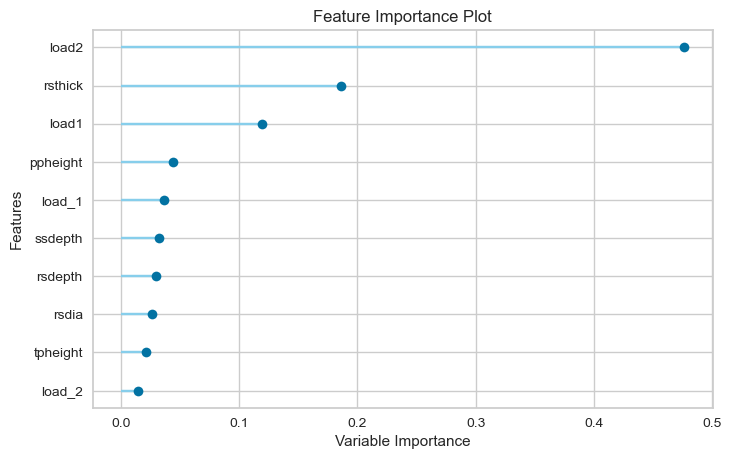

In [63]:
plot_model(rfor, plot='feature')

In [64]:
predict_model(rfor)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1649,0.0502,0.2240,0.5848,0.0802,0.0849


,rsdia,rsthick,ssdepth,rsdepth,tpheight,ssthick,ppheight,load1,load2,load_1,load_2,crackoff,Label
0,2.319386,-2.221273,0.129394,-0.650662,-2.249274,1.171793,-0.533141,1.741180,1.980425,0.004040,0.305582,0.98,1.7971
1,-0.280992,0.382351,-0.824645,-0.163160,-0.264552,-1.097214,2.388080,0.529457,-0.111547,0.369304,0.161762,2.43,2.4661
2,1.371212,0.574046,0.349040,0.605071,-0.049228,-0.201192,-0.629026,-0.272561,-0.725905,0.917750,0.757871,2.62,2.6618
3,-0.029264,-0.131873,0.538913,0.065860,0.246667,-0.201192,1.359411,-0.482548,-1.989294,-2.090790,0.048299,2.30,2.3205
4,0.457137,-0.219430,-0.231731,0.065860,0.397236,0.288689,1.148497,0.776673,-1.925439,-0.725437,-2.416508,2.39,2.3407
5,0.623305,0.080725,-0.362009,-0.650662,-2.504002,-0.698929,0.719361,-2.415945,-1.738978,1.054944,-0.407030,2.19,2.3243
6,-1.045874,0.850503,0.168281,-0.012022,0.277474,0.094775,0.029564,0.401084,0.305793,-0.907637,0.635384,2.80,2.6476
7,0.623305,0.213773,0.349040,-0.650662,0.397236,1.585361,1.568492,0.776673,-0.111547,1.283663,0.666448,2.50,2.4936
8,1.542480,-0.818712,-0.231731,0.475951,0.805734,-0.201192,0.935191,-1.211970,0.921077,-1.135310,0.340339,2.52,2.3764
9,0.623305,-0.219430,0.328498,0.916070,2.268984,0.094775,1.775767,-0.375480,0.562713,-0.588749,0.009397,2.56,2.3486


In [65]:
unseen_predict=predict_model(rfor, data=data_unseen)
unseen_predict

,rsdia,rsthick,ssdepth,rsdepth,tpheight,ssthick,ppheight,load1,load2,load_1,load_2,crackoff,Label
0,35.820,13.040,6.910,9.030,27.550,5.260,73.090,227.0,552.0,204,512,2.31,2.3204
1,35.820,13.090,6.950,9.060,27.490,5.280,73.060,196.0,570.0,241,576,2.30,2.3126
2,35.740,13.060,6.790,9.060,27.410,5.280,73.100,208.0,492.0,182,497,2.28,2.2748
3,35.768,13.120,6.830,9.074,27.500,5.221,73.140,212.0,518.0,198,516,2.43,2.4661
4,35.910,13.010,6.980,9.081,27.460,5.300,73.035,190.0,564.0,209,489,2.27,2.2844
5,35.840,13.062,6.870,9.080,27.540,5.276,73.080,221.0,481.0,174,463,2.39,2.3407
6,35.860,13.040,6.810,9.066,27.490,5.290,73.090,195.0,527.0,200,504,2.20,2.2269
7,35.860,13.070,6.760,9.082,27.480,5.240,72.960,204.0,531.0,196,499,2.30,2.3451
8,35.810,13.030,6.890,9.100,27.560,5.300,73.040,206.0,514.0,201,512,2.42,2.3994
9,35.770,12.870,6.862,9.080,27.700,5.290,73.010,242.0,654.9,212,527,2.32,2.2698
